In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=b55290389745c64242046856c7e4a716cd478c86bbe730bd3210a459d12de17e
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


In [ ]:
# Mengimport semua library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
df = pd.read_csv("/content/Data_TA.csv")
df.head()

,Tahun,Bulan,Hari,Curah_hujan,Kelembaban,Suhu_maks,Suhu_min,Tekanan,Angin_permukaan
0,2011,1,1,0.92,18.62,28.19,23.41,100.26,1.52
1,2011,1,2,2.80,18.55,28.96,23.23,100.32,1.42
2,2011,1,3,7.22,17.88,28.03,23.23,100.38,1.15
3,2011,1,4,14.05,18.07,27.65,22.26,100.32,1.82
4,2011,1,5,12.97,18.25,28.69,22.56,100.26,2.02


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
print("Shape of Data is ==> ",df.shape)

Shape of Data is ==>  (4018, 9)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tahun            4018 non-null   int64  
 1   Bulan            4018 non-null   int64  
 2   Hari             4018 non-null   int64  
 3   Curah_hujan      4018 non-null   float64
 4   Kelembaban       4018 non-null   float64
 5   Suhu_maks        4018 non-null   float64
 6   Suhu_min         4018 non-null   float64
 7   Tekanan          4018 non-null   float64
 8   Angin_permukaan  4018 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 282.6 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tahun,4018.0,2016.000000,3.162750,2011.00,2013.0000,2016.00,2019.000,2021.00
Bulan,4018.0,6.522648,3.449210,1.00,4.0000,7.00,10.000,12.00
Hari,4018.0,15.730463,8.801536,1.00,8.0000,16.00,23.000,31.00
Curah_hujan,4018.0,6.998982,13.483487,0.00,0.4025,2.75,8.775,424.26
Kelembaban,4018.0,18.448203,0.879616,13.61,17.9400,18.49,19.040,21.42
Suhu_maks,4018.0,30.020543,1.355040,26.18,29.1900,30.03,30.780,37.29
Suhu_min,4018.0,23.168686,0.913762,19.31,22.6400,23.27,23.800,25.52
Tekanan,4018.0,100.557407,0.124478,100.12,100.4800,100.56,100.640,100.99
Angin_permukaan,4018.0,1.339333,0.443485,0.35,0.9900,1.30,1.660,2.73


In [ ]:
df.dtypes

Tahun                int64
Bulan                int64
Hari                 int64
Curah_hujan        float64
Kelembaban         float64
Suhu_maks          float64
Suhu_min           float64
Tekanan            float64
Angin_permukaan    float64
dtype: object

In [ ]:
df.isnull().sum()

Tahun              0
Bulan              0
Hari               0
Curah_hujan        0
Kelembaban         0
Suhu_maks          0
Suhu_min           0
Tekanan            0
Angin_permukaan    0
dtype: int64

In [ ]:
df1 = pd.DataFrame ((df),
columns = ['Curah_hujan'])
df.loc [df1['Curah_hujan'] < 0.5, 'Label Curah Hujan'] = 'Tidak Hujan'
df.loc [df1['Curah_hujan'] >= 0.5, 'Label Curah Hujan'] = 'Hujan'
df

,Tahun,Bulan,Hari,Curah_hujan,Kelembaban,Suhu_maks,Suhu_min,Tekanan,Angin_permukaan,Label Curah Hujan
0,2011,1,1,0.92,18.62,28.19,23.41,100.26,1.52,Hujan
1,2011,1,2,2.80,18.55,28.96,23.23,100.32,1.42,Hujan
2,2011,1,3,7.22,17.88,28.03,23.23,100.38,1.15,Hujan
3,2011,1,4,14.05,18.07,27.65,22.26,100.32,1.82,Hujan
4,2011,1,5,12.97,18.25,28.69,22.56,100.26,2.02,Hujan
...,...,...,...,...,...,...,...,...,...,...
4013,2021,12,27,12.31,19.04,29.05,23.92,100.70,1.12,Hujan
4014,2021,12,28,1.77,19.04,28.31,23.78,100.63,1.44,Hujan
4015,2021,12,29,0.32,18.74,28.95,23.32,100.60,1.08,Tidak Hujan
4016,2021,12,30,1.97,19.23,30.69,22.70,100.55,1.27,Hujan


In [ ]:
df['Label Curah Hujan'].value_counts()

Hujan          2940
Tidak Hujan    1078
Name: Label Curah Hujan, dtype: int64

In [ ]:
for i in df.columns:
    print(i)

Tahun
Bulan
Hari
Curah_hujan
Kelembaban
Suhu_maks
Suhu_min
Tekanan
Angin_permukaan
Label Curah Hujan


In [ ]:
df.drop(['Tahun'],axis = 1,inplace=True)
df.drop('Bulan',axis = 1,inplace=True)
df.drop('Hari',axis = 1,inplace=True)
df.drop('Curah_hujan',axis = 1,inplace=True)

In [ ]:
df.shape

(4018, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kelembaban         4018 non-null   float64
 1   Suhu_maks          4018 non-null   float64
 2   Suhu_min           4018 non-null   float64
 3   Tekanan            4018 non-null   float64
 4   Angin_permukaan    4018 non-null   float64
 5   Label Curah Hujan  4018 non-null   object 
dtypes: float64(5), object(1)
memory usage: 188.5+ KB


In [ ]:
df['Label Curah Hujan'].replace({'Tidak Hujan': 0, 'Hujan': 1},inplace = True)
df

,Kelembaban,Suhu_maks,Suhu_min,Tekanan,Angin_permukaan,Label Curah Hujan
0,18.62,28.19,23.41,100.26,1.52,1
1,18.55,28.96,23.23,100.32,1.42,1
2,17.88,28.03,23.23,100.38,1.15,1
3,18.07,27.65,22.26,100.32,1.82,1
4,18.25,28.69,22.56,100.26,2.02,1
...,...,...,...,...,...,...
4013,19.04,29.05,23.92,100.70,1.12,1
4014,19.04,28.31,23.78,100.63,1.44,1
4015,18.74,28.95,23.32,100.60,1.08,0
4016,19.23,30.69,22.70,100.55,1.27,1


In [ ]:
df['Label Curah Hujan']=df['Label Curah Hujan'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Kelembaban         4018 non-null   float64 
 1   Suhu_maks          4018 non-null   float64 
 2   Suhu_min           4018 non-null   float64 
 3   Tekanan            4018 non-null   float64 
 4   Angin_permukaan    4018 non-null   float64 
 5   Label Curah Hujan  4018 non-null   category
dtypes: category(1), float64(5)
memory usage: 161.1 KB


In [ ]:
df.head()

,Kelembaban,Suhu_maks,Suhu_min,Tekanan,Angin_permukaan,Label Curah Hujan
0,18.62,28.19,23.41,100.26,1.52,1
1,18.55,28.96,23.23,100.32,1.42,1
2,17.88,28.03,23.23,100.38,1.15,1
3,18.07,27.65,22.26,100.32,1.82,1
4,18.25,28.69,22.56,100.26,2.02,1


In [ ]:
X = df.drop(['Label Curah Hujan'], axis=1)
y = df[['Label Curah Hujan']]

In [ ]:
X.head()

,Kelembaban,Suhu_maks,Suhu_min,Tekanan,Angin_permukaan
0,18.62,28.19,23.41,100.26,1.52
1,18.55,28.96,23.23,100.32,1.42
2,17.88,28.03,23.23,100.38,1.15
3,18.07,27.65,22.26,100.32,1.82
4,18.25,28.69,22.56,100.26,2.02


In [ ]:
y.head()

,Label Curah Hujan
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=False) 
print("Jumlah Data X_train = ",X_train.shape)
print("Jumlah Data Y_train = ",y_train.shape)
print("Jumlah Data X_test = ",X_test.shape)
print("Jumlah Data Y_test = ",y_test.shape)

Jumlah Data X_train =  (2611, 5)
Jumlah Data Y_train =  (2611, 1)
Jumlah Data X_test =  (1407, 5)
Jumlah Data Y_test =  (1407, 1)


In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from ann_visualizer.visualize import ann_viz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# Compile model"
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=30, batch_size=10)
# evaluate the model
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/30
262/262 [==============================] - 2s 4ms/step - loss: 0.6345 - accuracy: 0.6515
Epoch 2/30
262/262 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7350
Epoch 3/30
262/262 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7350
Epoch 4/30
262/262 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7350
Epoch 5/30
262/262 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7350
Epoch 6/30
262/262 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7350
Epoch 7/30
262/262 [==============================] - 1s 2ms/step - loss: 0.5554 - accuracy: 0.7350
Epoch 8/30
262/262 [==============================] - 1s 3ms/step - loss: 0.5483 - accuracy: 0.7350
Epoch 9/30
262/262 [==============================] - 1s 2ms/step - loss: 0.5408 - accuracy: 0.7350
Epoch 10/30
262/262 [==============================] - 1s 2ms/step - loss: 0.5350 - accuracy: 0.7350

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred =(y_pred > 0.6)
score = accuracy_score(y_test,y_pred)
print('accuracy2 :',score)

accuracy2 : 0.8173418621179815


In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 15)                90        
                                                                 
 dense_45 (Dense)            (None, 1)                 16        
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model


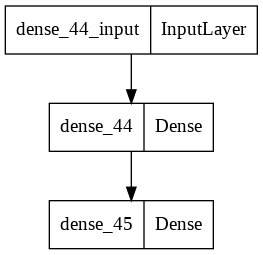

In [ ]:
plot_model(model, to_file='modelfix.png', show_shapes=False)

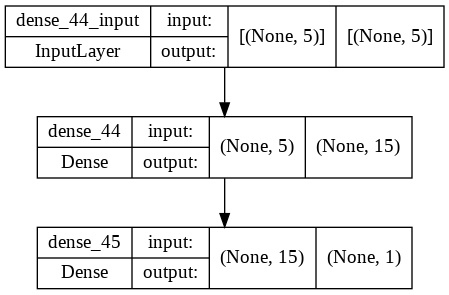

In [ ]:
plot_model(model, to_file='modelfix2.png', show_shapes=True)

In [ ]:
from ann_visualizer.visualize import ann_viz
import graphviz


In [ ]:
ann_viz(model, filename='ANN_Fix', title="Tugas Akhir Artificial Neural Network")

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.6)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[200 186]
 [ 72 949]]


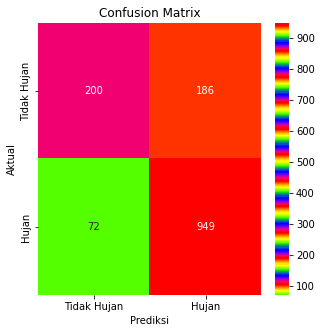

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 
cm_df = pd.DataFrame(cm,
                     index = ['Tidak Hujan','Hujan'], 
                     columns = ['Tidak Hujan','Hujan'])

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt=".0f",ax=ax, cmap = 'prism_r')
plt.title('Confusion Matrix')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.savefig('plot_confusion_matrix_ANN.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61       386
           1       0.84      0.93      0.88      1021

    accuracy                           0.82      1407
   macro avg       0.79      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407



In [ ]:
comp_df = y_test.copy()
comp_df['Prediksi'] = y_pred
comp_df.rename(columns = {'Label Curah Hujan':'Aktual'}, inplace = False)
comp_df

,Label Curah Hujan,Prediksi
2611,1,True
2612,1,True
2613,1,True
2614,1,True
2615,1,True
...,...,...
4013,1,True
4014,1,True
4015,0,True
4016,1,True


In [ ]:
comp_df.to_excel('ANN_fix.xlsx')